<a href="https://colab.research.google.com/github/shubh-eng/ML/blob/master/Experiment3_J069_24_7_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 3

# 1) Importing and filtering of data and showing descriptive statistics

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
!conda install -c anaconda xlrd --yes

data = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

/bin/bash: conda: command not found
Data read into a pandas dataframe!


In [3]:
data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [4]:
data.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [6]:
data.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [7]:
data.drop(['AREA','REG','Type','Coverage','DEV'], axis='columns', inplace=True)
data.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region','DevName':'DevStatus'}, inplace=True)
data['Total'] = data.sum(axis='columns')
data.head()

,Country,Continent,Region,DevStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [8]:
data.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [9]:
data.isnull().sum()

Country      0
Continent    0
Region       0
DevStatus    0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [10]:
condition = data['Continent'] == 'Asia'

data[condition]

,Country,Continent,Region,DevStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310
11,Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,17,18,23,26,38,62,54,77,98,186,167,230,359,236,203,125,165,209,138,161,57,2649
13,Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,2,10,9,6,9,9,11,14,10,17,28,14,27,34,13,17,15,12,12,12,22,9,35,28,21,39,32,475
14,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
20,Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487,5876
25,Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,16,103,63,44,65,31,36,14,17,4,6,1,3,6,3,4,6,3,4,5,11,10,5,12,6,3,6,600
30,Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,14,15,27,34,38,93,418,371,286,216,313,241,165,245,259,230,277,348,370,529,460,354,203,200,196,233,288,6538
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
37,"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,257,400,470,379,430,446,536,729,712,674,897,657,623,591,728,774,9327


In [11]:
data[(data['Continent']=='Asia') | (data['Continent']=='Europe')]

,Country,Continent,Region,DevStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310
10,Austria,Europe,Western Europe,Developed regions,234,238,201,117,127,165,196,265,198,227,158,189,131,132,133,153,191,152,190,117,97,134,87,113,118,122,102,98,91,109,124,84,102,90,4985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,United Arab Emirates,Asia,Western Asia,Developing regions,0,2,2,1,2,0,5,4,1,17,7,23,27,11,13,8,33,27,25,24,27,41,37,32,41,31,42,37,33,37,86,60,54,46,836
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
187,Uzbekistan,Asia,Central Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,12,44,33,34,58,75,97,106,101,102,144,155,175,330,262,284,215,288,289,162,235,167,3368
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146


In [12]:
data[['Country',1980,1981]]

,Country,1980,1981
0,Afghanistan,16,39
1,Albania,1,0
2,Algeria,80,67
3,American Samoa,0,1
4,Andorra,0,0
...,...,...,...
190,Viet Nam,1191,1829
191,Western Sahara,0,0
192,Yemen,1,2
193,Zambia,11,17


In [13]:
type(data.Country)

pandas.core.series.Series

In [14]:
type(data[['Country',1980,1981]])

pandas.core.frame.DataFrame

In [15]:
data.index

RangeIndex(start=0, stop=195, step=1)

In [16]:
data.set_index('Country', inplace=True)
data.head()

,Continent,Region,DevStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [17]:
data.loc['India']

Continent                  Asia
Region            Southern Asia
DevStatus    Developing regions
1980                       8880
1981                       8670
1982                       8147
1983                       7338
1984                       5704
1985                       4211
1986                       7150
1987                      10189
1988                      11522
1989                      10343
1990                      12041
1991                      13734
1992                      13673
1993                      21496
1994                      18620
1995                      18489
1996                      23859
1997                      22268
1998                      17241
1999                      18974
2000                      28572
2001                      31223
2002                      31889
2003                      27155
2004                      28235
2005                      36210
2006                      33848
2007                      28742
2008    

# 2) Line Plot

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [19]:
years = range(1980,2014)
india = data.loc['India',years]
india.head()

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
Name: India, dtype: object

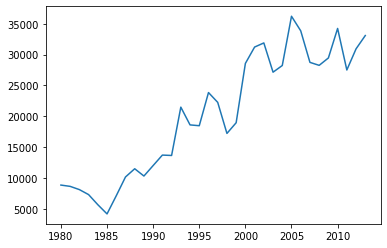

In [20]:
india.plot()

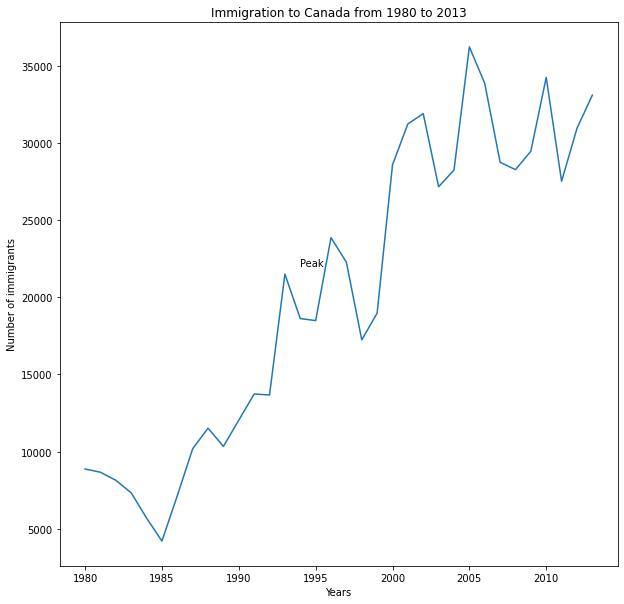

In [21]:
years = range(1980,2014)
india = data.loc['India',years]
india.plot(
    kind='line',
    figsize=(10,10)
)
plt.title('Immigration to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.text(1994,22000,"Peak")
plt.show()

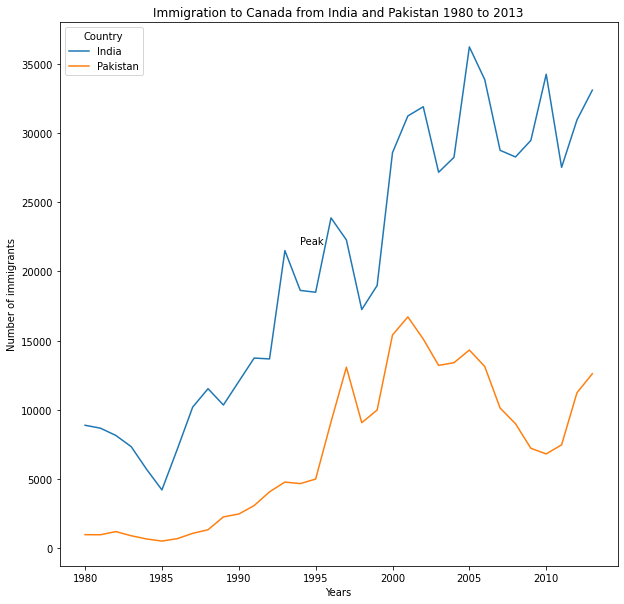

In [22]:
years = range(1980,2014)
indopak = data.loc[['India','Pakistan'],years]
indopak1 = indopak.transpose()
indopak1
indopak1.plot(
    kind='line',
    figsize=(10,10)
)
plt.title('Immigration to Canada from India and Pakistan 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.text(1994,22000,"Peak")
plt.show()

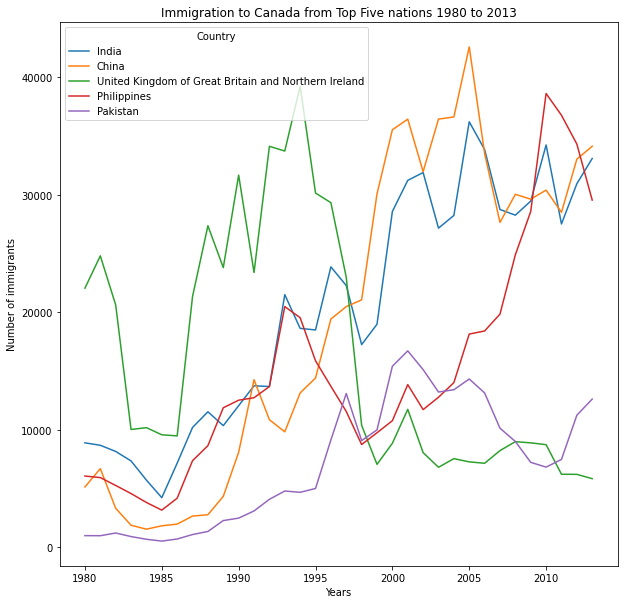

In [23]:
# top 5 countries
data.sort_values(by='Total', ascending=False, inplace=True, axis='index')
data.head()
dftop = data.head(5)
dftop
dftop = dftop[years]
dftop1 = dftop.transpose()
dftop1.plot(
    kind='line',
    figsize=(10,10)
)
plt.title('Immigration to Canada from Top Five nations 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

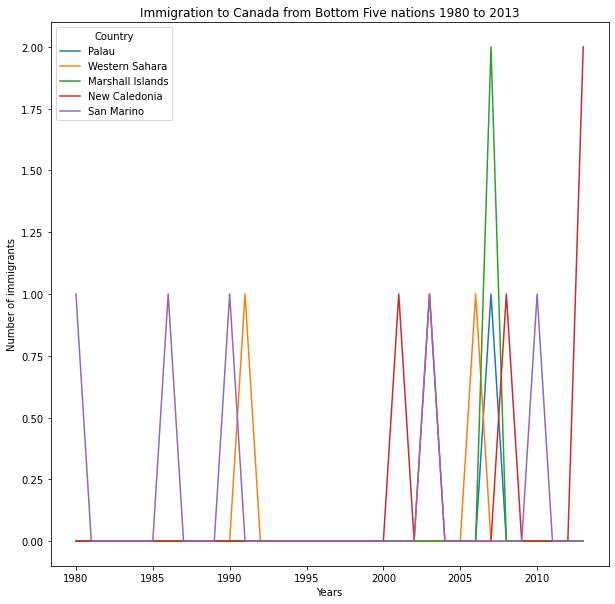

In [24]:
# top 5 countries
data.sort_values(by='Total', ascending=True, inplace=True, axis='index')
data.head()
dftop = data.head(5)
dftop
dftop = dftop[years]
dftop1 = dftop.transpose()
dftop1.plot(
    kind='line',
    figsize=(10,10)
)
plt.title('Immigration to Canada from Bottom Five nations 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

# 3) Area plot

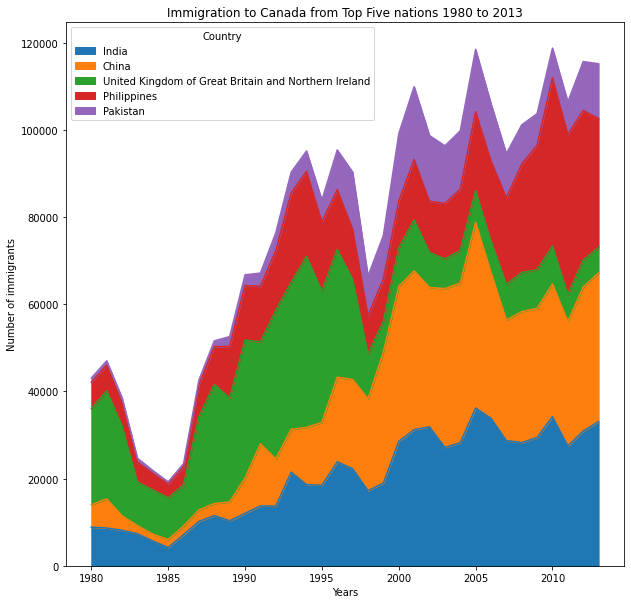

In [25]:
# top 5 countries
data.sort_values(by='Total', ascending=False, inplace=True, axis='index')
data.head()
dftop = data.head(5)
dftop
dftop = dftop[years]
dftop1 = dftop.transpose()
dftop1.plot(
    kind='area',
    figsize=(10,10)
)
plt.title('Immigration to Canada from Top Five nations 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

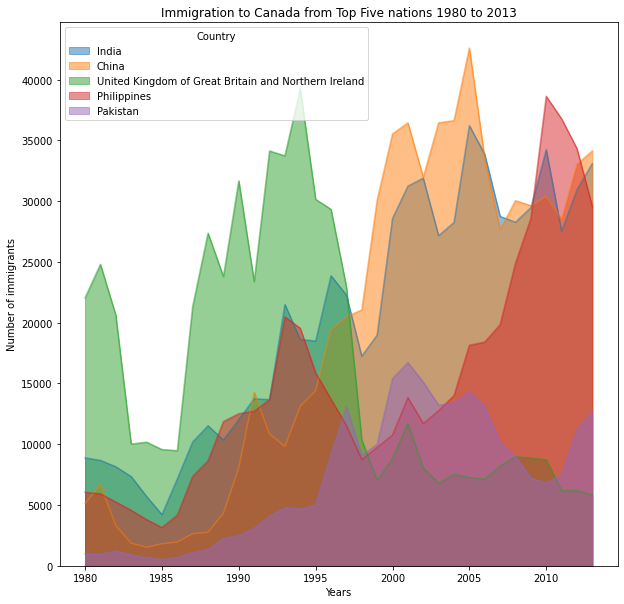

In [26]:
dftop1.plot(
    kind='area',
    figsize=(10,10),
    stacked=False
)
plt.title('Immigration to Canada from Top Five nations 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

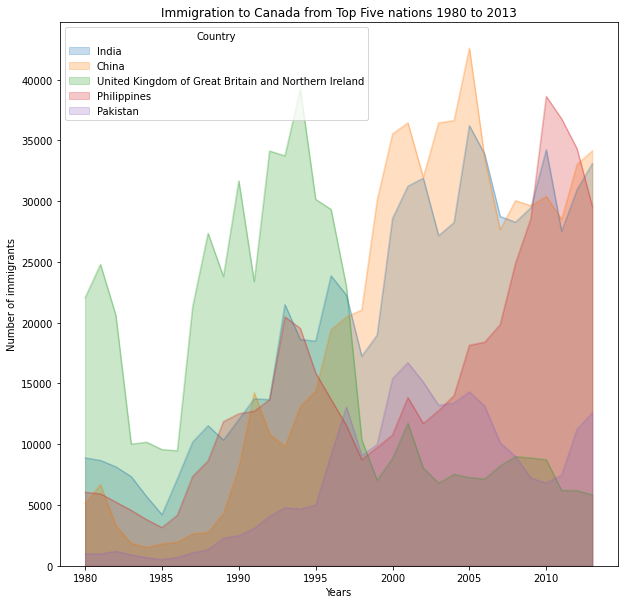

In [27]:
dftop1.plot(
    kind='area',
    figsize=(10,10),
    stacked=False,
    alpha=0.25   #for transparency - range is 0-1, default is 0.5
)
plt.title('Immigration to Canada from Top Five nations 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

In [28]:
data[2013].head()
count, bins = np.histogram(data[2013])
print(count)
print(bins)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


# 4) Histogram 

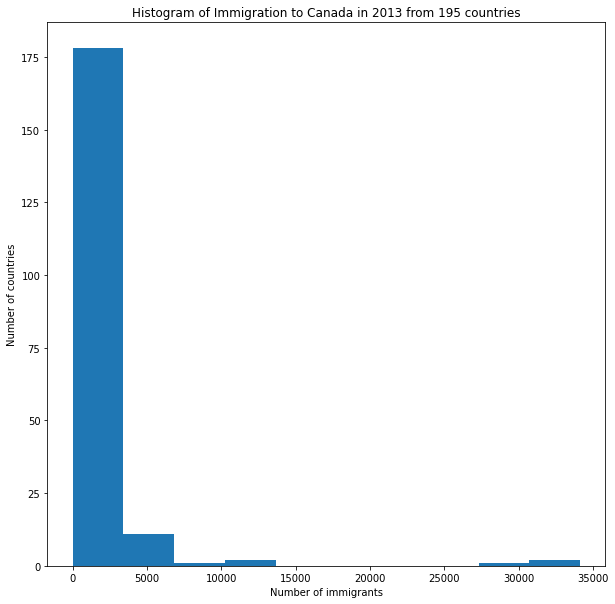

In [29]:
data[2013].plot(
    kind='hist',
    figsize=(10,10)
)
plt.title('Histogram of Immigration to Canada in 2013 from 195 countries')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')
plt.show()

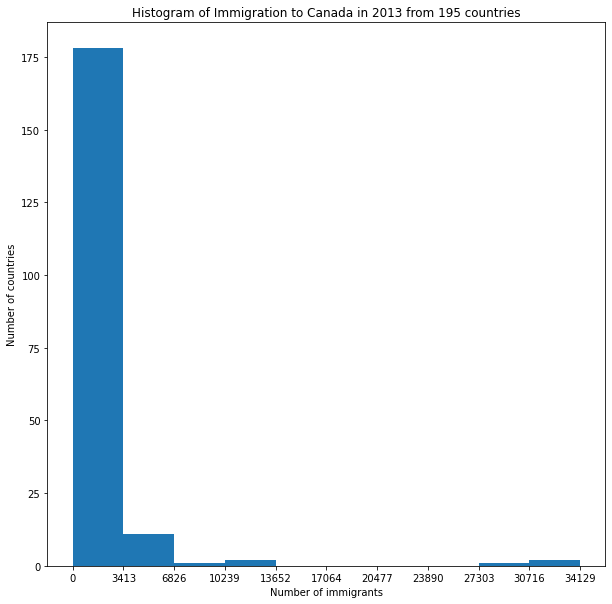

In [30]:
count, bins = np.histogram(data[2013])
data[2013].plot(
    kind='hist',
    figsize=(10,10),
    xticks=bins
)
plt.title('Histogram of Immigration to Canada in 2013 from 195 countries')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')
plt.show()

# 5) Bar plot

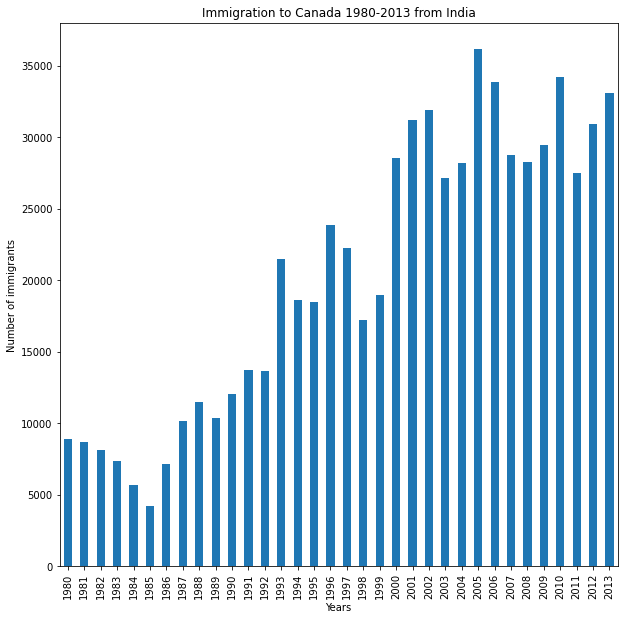

In [31]:
years = range(1980,2014)
df_india = data.loc['India', years]

df_india.plot(
    kind='bar',
    figsize=(10,10)
)
plt.title('Immigration to Canada 1980-2013 from India')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

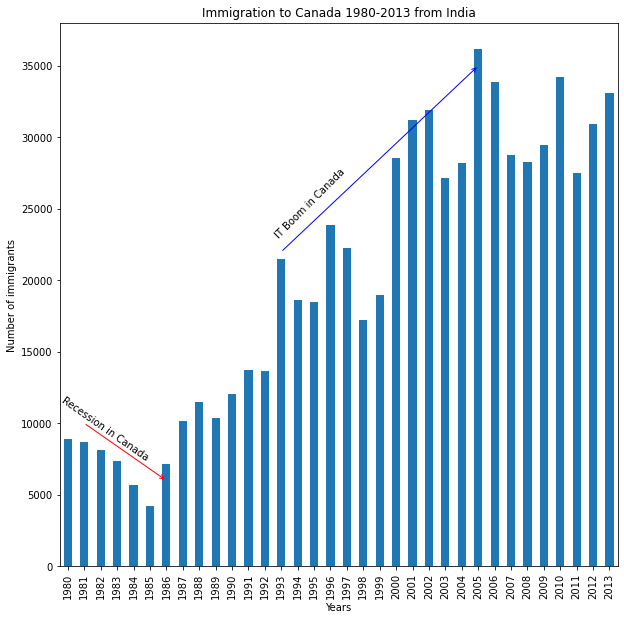

In [33]:
years = range(1980,2014)
df_india = data.loc['India', years]

df_india.plot(
    kind='bar',
    figsize=(10,10)
)
plt.title('Immigration to Canada 1980-2013 from India')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.annotate(
    'IT Boom in Canada',
     xy=(17,28000),
     rotation = 45,
     va='top',
     ha='right'
)
plt.annotate(
    '',
     xy=(25,35000),
     xytext=(13,22000),
     xycoords='data',
     arrowprops=dict(arrowstyle='->', color='blue')

)
plt.annotate(
    'Recession in Canada', # text
     xy=(5,12000), #pos of text
     rotation = -35,
     va='top',
     ha='right'
)
plt.annotate(
    '',
     xy=(6,6000), #head of arrow
     xytext=(1,10000), #base of arrow
     xycoords='data',
     arrowprops=dict(arrowstyle='->', color='red')

)
plt.show()

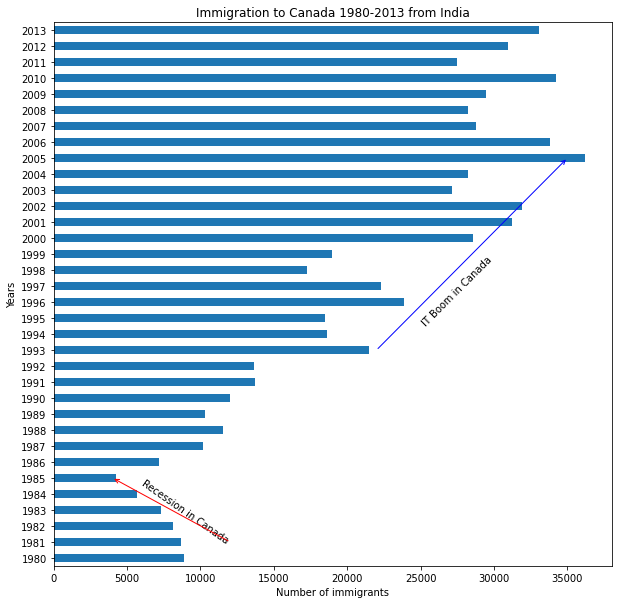

In [34]:
years = range(1980,2014)
df_india = data.loc['India', years]

df_india.plot(
    kind='barh',
    figsize=(10,10)
)
plt.annotate(
    'IT Boom in Canada',
     xy=(30000,19),
     rotation = 45,
     va='top',
     ha='right'
)
plt.annotate(
    '',
     xy=(35000,25),
     xytext=(22000,13),
     xycoords='data',
     arrowprops=dict(arrowstyle='->', color='blue')

)
plt.annotate(
    'Recession in Canada', # text
     xy=(12000,5), #pos of text
     rotation = -35,
     va='top',
     ha='right'
)
plt.annotate(
    '',
     xy=(4000,5), #head of arrow
     xytext=(12000,1), #base of arrow
     xycoords='data',
     arrowprops=dict(arrowstyle='->', color='red')
)
plt.title('Immigration to Canada 1980-2013 from India')
plt.ylabel('Years')
plt.xlabel('Number of immigrants')
plt.show()